In [ ]:
from __future__ import print_function
import pandas as pd
import numpy as np
import sys
import h5py
import math
import os
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import Normalizer , LabelEncoder , StandardScaler
from keras.utils.np_utils import to_categorical
from sklearn.metrics import (precision_score, recall_score,f1_score, accuracy_score,mean_squared_error,mean_absolute_error, matthews_corrcoef)

In [ ]:
# initializing all the model objects with default parameters
#Classifier

import xgboost as xgb
from sklearn.svm import SVC
from sklearn.naive_bayes import GaussianNB
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.ensemble import AdaBoostClassifier
from sklearn.ensemble import ExtraTreesClassifier


In [ ]:
from tensorflow.keras.preprocessing import sequence
from keras.utils import np_utils
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Convolution1D,MaxPooling1D
from tensorflow.keras.layers import Dense, Dropout, Activation, Embedding
from tensorflow.keras.layers import LSTM, SimpleRNN, GRU ,Bidirectional, BatchNormalization ,Flatten, ConvLSTM1D
from tensorflow.keras.callbacks import ModelCheckpoint, EarlyStopping, ReduceLROnPlateau, CSVLogger
from tensorflow.compat.v1.keras.layers import CuDNNLSTM, CuDNNGRU

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:
path_to_module = '/content/drive/MyDrive/Advanced-Feature-Selection-Toolbox-main/'
sys.path.append(path_to_module)

In [ ]:
from AFS.issa import jfs

In [ ]:
df=pd.read_csv(r'/content/drive/MyDrive/darknet/Darknet.csv')

In [ ]:
df.info(verbose=True)

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 141530 entries, 0 to 141529
Data columns (total 85 columns):
 #   Column                      Non-Null Count   Dtype  
---  ------                      --------------   -----  
 0   Flow ID                     141530 non-null  object 
 1   Src IP                      141530 non-null  object 
 2   Src Port                    141530 non-null  int64  
 3   Dst IP                      141530 non-null  object 
 4   Dst Port                    141530 non-null  int64  
 5   Protocol                    141530 non-null  int64  
 6   Timestamp                   141530 non-null  object 
 7   Flow Duration               141530 non-null  int64  
 8   Total Fwd Packet            141530 non-null  int64  
 9   Total Bwd packets           141530 non-null  int64  
 10  Total Length of Fwd Packet  141530 non-null  int64  
 11  Total Length of Bwd Packet  141530 non-null  int64  
 12  Fwd Packet Length Max       141530 non-null  int64  
 13  Fwd Packet Len

In [ ]:
df['Label.1'].value_counts()


P2P                48520
BROWSING           32808
AUDIO-STREAMING    18064
CHAT               11478
FILE-TRANSFER      11182
VIDEO-STREAMING     9767
EMAIL               6145
VOIP                3566
Name: Label.1, dtype: int64

In [ ]:
df['Label.1'] = df['Label.1'].str.upper()

In [ ]:
df.replace([np.inf, - np.inf], np.nan, inplace = True)

In [ ]:
df=df.dropna()

In [ ]:
dff=df.drop(['Flow ID','Src IP','Dst IP','Timestamp','Label'],axis=1)

In [ ]:
dff

In [ ]:
label=LabelEncoder()
dff['Label.1']=label.fit_transform(dff['Label.1'])

In [ ]:
traindata, testdata = train_test_split(dff,test_size=0.20,random_state=42)

In [ ]:
X = traindata.iloc[:,0:79]
Y = traindata['Label.1']
C = testdata['Label.1']
T = testdata.iloc[:,0:79]

In [ ]:
xtrain=X.values
ytrain=Y.values
xtest=T.values
ytest=C.values

In [ ]:
feat = dff.iloc[:,0:79]
label = dff['Label.1']

In [ ]:
fold = {'xt':xtrain, 'yt':ytrain, 'xv':xtest, 'yv':ytest}

In [ ]:
# parameter
k    = 5     # k-value in KNN
N    = 10    # number of salps
T    = 20   # maximum number of iterations
opts = {'k':k, 'fold':fold, 'N':N, 'T':T}

In [ ]:
# perform feature selection
fmdl = jfs(feat, label, opts)
sf   = fmdl['sf']

Iteration: 1
Best (ISSA): 0.1533125084154826
Iteration: 2
Best (ISSA): 0.15319928802221291
Iteration: 3
Best (ISSA): 0.15319928802221291
Iteration: 4
Best (ISSA): 0.15300589631767558
Iteration: 5
Best (ISSA): 0.15196457736048413
Iteration: 6
Best (ISSA): 0.1509767059441377
Iteration: 7
Best (ISSA): 0.15092009574750284
Iteration: 8
Best (ISSA): 0.1507318036576763
Iteration: 9
Best (ISSA): 0.1507318036576763
Iteration: 10
Best (ISSA): 0.15010715453577175
Iteration: 11
Best (ISSA): 0.1497006839299062
Iteration: 12
Best (ISSA): 0.1497006839299062
Iteration: 13
Best (ISSA): 0.1497006839299062
Iteration: 14
Best (ISSA): 0.14529754238831066
Iteration: 15
Best (ISSA): 0.14529754238831066
Iteration: 16
Best (ISSA): 0.14529754238831066
Iteration: 17
Best (ISSA): 0.14529754238831066
Iteration: 18
Best (ISSA): 0.14529754238831066
Iteration: 19
Best (ISSA): 0.14529754238831066
Iteration: 20
Best (ISSA): 0.14529754238831066


In [ ]:
# number of selected features
num_feat = fmdl['nf']
print("Feature Size:", num_feat)

Feature Size: 34


In [ ]:
sf

array([ 0,  1,  3,  5,  6,  7,  9, 15, 19, 22, 23, 24, 30, 32, 33, 35, 37,
       42, 44, 46, 47, 51, 52, 54, 55, 58, 61, 64, 67, 69, 71, 75, 76, 78])

In [ ]:
fmdl

{'sf': array([ 0,  1,  3,  5,  6,  7,  9, 15, 19, 22, 23, 24, 30, 32, 33, 35, 37,
        42, 44, 46, 47, 51, 52, 54, 55, 58, 61, 64, 67, 69, 71, 75, 76, 78]),
 'c': array([[0.15331251, 0.15319929, 0.15319929, 0.1530059 , 0.15196458,
         0.15097671, 0.1509201 , 0.1507318 , 0.1507318 , 0.15010715,
         0.14970068, 0.14970068, 0.14970068, 0.14529754, 0.14529754,
         0.14529754, 0.14529754, 0.14529754, 0.14529754, 0.14529754]]),
 'nf': 34}

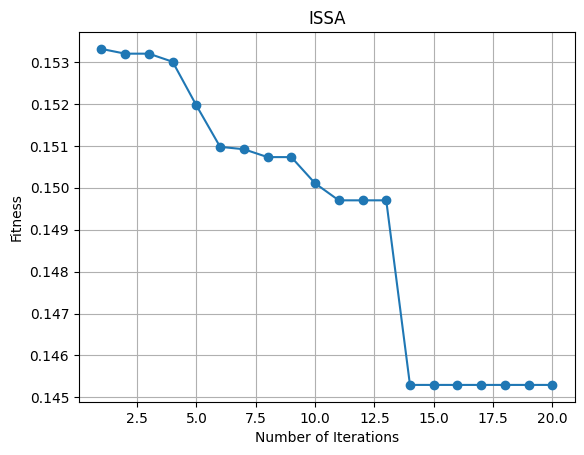

In [ ]:
# plot convergence
curve   = fmdl['c']
curve   = curve.reshape(np.size(curve,1))
x       = np.arange(0, opts['T'], 1.0) + 1.0

fig, ax = plt.subplots()
ax.plot(x, curve, 'o-')
ax.set_xlabel('Number of Iterations')
ax.set_ylabel('Fitness')
ax.set_title('ISSA')
ax.grid()
plt.show()

In [ ]:
data=dff.iloc[:,[0,  1,  3,  5,  6,  7,  9, 15, 19, 22, 23, 24, 30, 32, 33, 35, 37, 42, 44, 46, 47, 51, 52, 54, 55, 58, 61, 64, 67, 69, 71, 75, 76, 78, 79]]

In [ ]:
data

,Src Port,Dst Port,Flow Duration,Total Bwd packets,Total Length of Fwd Packet,Total Length of Bwd Packet,Fwd Packet Length Min,Bwd Packet Length Std,Flow IAT Std,Fwd IAT Total,...,Fwd Packet/Bulk Avg,Bwd Packet/Bulk Avg,Subflow Fwd Bytes,FWD Init Win Bytes,Fwd Act Data Pkts,Active Mean,Idle Mean,Idle Std,Idle Min,Label.1
0,57158,443,229,1,0,0,0,0.000000,0.000000,0,...,0,0,0,1892,0,0,0.000000e+00,0.000000e+00,0.000000e+00,0
1,57159,443,407,1,0,0,0,0.000000,0.000000,0,...,0,0,0,1987,0,0,0.000000e+00,0.000000e+00,0.000000e+00,0
2,57160,443,431,1,0,0,0,0.000000,0.000000,0,...,0,0,0,2049,0,0,0.000000e+00,0.000000e+00,0.000000e+00,0
3,49134,443,359,1,0,0,0,0.000000,0.000000,0,...,0,0,0,2008,0,0,0.000000e+00,0.000000e+00,0.000000e+00,0
4,34697,19305,10778451,400,64530,6659,0,46.833714,11412.466410,10778451,...,0,659,65,1382,581,0,1.437760e+15,3.117718e+06,1.437760e+15,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
141525,55219,5355,411806,0,44,0,22,0.000000,0.000000,411806,...,0,0,22,0,1,0,0.000000e+00,0.000000e+00,0.000000e+00,7
141526,64207,5355,411574,0,44,0,22,0.000000,0.000000,411574,...,0,0,22,0,1,0,0.000000e+00,0.000000e+00,0.000000e+00,7
141527,61115,5355,422299,0,44,0,22,0.000000,0.000000,422299,...,0,0,22,0,1,0,0.000000e+00,0.000000e+00,0.000000e+00,7
141528,64790,5355,411855,0,44,0,22,0.000000,0.000000,411855,...,0,0,22,0,1,0,0.000000e+00,0.000000e+00,0.000000e+00,7


In [ ]:
traindata, testdata = train_test_split(data,test_size=0.20,random_state=42)

In [ ]:
X = traindata.iloc[:,0:34]
Y = traindata['Label.1']
C = testdata['Label.1']
T = testdata.iloc[:,0:34]

In [ ]:
scaler = StandardScaler().fit(X)
trainX = scaler.transform(X)
# summarize transformed data
np.set_printoptions(precision=3)
#print(trainX[0:5,:])

scaler = StandardScaler().fit(T)
testT = scaler.transform(T)
# summarize transformed data
np.set_printoptions(precision=3)
#print(testT[0:5,:])


y_train = np.array(Y)
y_test = np.array(C)

In [ ]:

# initializing all the model objects with default parameters
#Classifier

et=ExtraTreesClassifier()
xg=xgb.XGBClassifier()
rf=RandomForestClassifier()
dt=DecisionTreeClassifier()
svc=SVC()
knn=KNeighborsClassifier()
ada=AdaBoostClassifier()
nb=GaussianNB()

In [ ]:
#check each classifier accuracy here
def clf_perform(cn):
  clf=cn
  clf.fit(trainX,y_train)
  y_pred=clf.predict(testT)
  acc=accuracy_score(y_test,y_pred)
  prc=precision_score(y_test,y_pred, average="weighted")
  rc=recall_score(y_test,y_pred, average="weighted")
  f1=f1_score(y_test,y_pred, average="weighted")
  print(acc,prc,rc,f1)

In [ ]:
clf_perform(xg)

0.5693536417288052 0.6611020794410436 0.5693536417288052 0.5931225146389375


In [ ]:
clf_perform(et)

0.6883415203025056 0.7298246854750685 0.6883415203025056 0.6801800940325804


In [ ]:
clf_perform(rf)

0.6005230236420822 0.6842432013830344 0.6005230236420822 0.613735953950666


In [ ]:
clf_perform(dt)

0.5457468989645545 0.5819800801488318 0.5457468989645545 0.5466747377489057


In [ ]:
clf_perform(ada)

0.47732975227055874 0.49676248830134917 0.47732975227055874 0.44795881782666863


/usr/local/lib/python3.9/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


In [ ]:
clf_perform(nb)

0.1649644838675478 0.38499800733231054 0.1649644838675478 0.1259705358332542


In [ ]:
clf_perform(knn)

0.8112874156270983 0.8031930942826143 0.8112874156270983 0.8050575700491507


In [ ]:
clf_perform(svc)

0.7638972329222179 0.7578961941054791 0.7638972329222179 0.7384715435858401


/usr/local/lib/python3.9/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


In [ ]:
!pip install catboost

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 76.6/76.6 MB 12.2 MB/s eta 0:00:00


In [ ]:
from catboost import CatBoostClassifier
cat=CatBoostClassifier(iterations=20,learning_rate=0.01)
clf=cat
clf.fit(trainX,y_train)
y_pred=clf.predict(testT)
acc=accuracy_score(y_test,y_pred)
prc=precision_score(y_test,y_pred, average="weighted")
rc=recall_score(y_test,y_pred, average="weighted")
f1=f1_score(y_test,y_pred, average="weighted")
print(acc,prc,rc,f1)


0:	learn: 2.3388078	total: 514ms	remaining: 9.77s
1:	learn: 2.2844995	total: 1.09s	remaining: 9.78s
2:	learn: 2.2357242	total: 2.07s	remaining: 11.7s
3:	learn: 2.1900862	total: 3.17s	remaining: 12.7s
4:	learn: 2.1472951	total: 4.02s	remaining: 12.1s
5:	learn: 2.1076595	total: 4.9s	remaining: 11.4s
6:	learn: 2.0698534	total: 5.4s	remaining: 10s
7:	learn: 2.0343347	total: 5.93s	remaining: 8.89s
8:	learn: 2.0007476	total: 6.42s	remaining: 7.85s
9:	learn: 1.9689668	total: 6.93s	remaining: 6.93s
10:	learn: 1.9385937	total: 7.42s	remaining: 6.07s
11:	learn: 1.9099437	total: 7.95s	remaining: 5.3s
12:	learn: 1.8825505	total: 8.45s	remaining: 4.55s
13:	learn: 1.8563395	total: 8.95s	remaining: 3.84s
14:	learn: 1.8314289	total: 9.44s	remaining: 3.15s
15:	learn: 1.8077159	total: 9.99s	remaining: 2.5s
16:	learn: 1.7844662	total: 10.8s	remaining: 1.91s
17:	learn: 1.7618028	total: 11.8s	remaining: 1.31s
18:	learn: 1.7406022	total: 12.8s	remaining: 672ms
19:	learn: 1.7198957	total: 13.7s	remaining: 0u

/usr/local/lib/python3.9/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


In [ ]:
!pip install lightgbm

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


In [ ]:
from lightgbm import LGBMClassifier
lgb=LGBMClassifier()

In [ ]:
clf_perform(lgb)

0.4177121249602431 0.5269400572173574 0.4177121249602431 0.44839069875752674


In [ ]:
# reshape input to be [samples, time steps, features]
X_train = np.reshape(trainX, (trainX.shape[0], trainX.shape[1],1))
X_test = np.reshape(testT, (testT.shape[0], testT.shape[1],1))


print(X_train.shape)


batch_size = 32

(113184, 34, 1)


In [ ]:
data['Label.1'].value_counts()

7     48520
2     32808
1     16580
3     11473
5     11089
9      9467
4      6143
8      3566
0      1470
10      281
6        84
Name: Label.1, dtype: int64

In [ ]:
model1 = Sequential()
model1.add(Convolution1D(20, 5, padding="same",activation="tanh",input_shape=(34, 1)))
model1.add(MaxPooling1D(pool_size=(2)))
model1.add(Convolution1D(40, 5, padding="same", activation="tanh"))
model1.add(MaxPooling1D(pool_size=(2)))
model1.add(Convolution1D(60, 5, padding="same",activation="tanh"))
model1.add(MaxPooling1D(pool_size=(1)))
model1.add(Bidirectional(CuDNNLSTM(64, return_sequences=True)))
model1.add(Dropout(0.2))
model1.add(CuDNNLSTM(64, return_sequences=True))
model1.add(Dropout(0.2))
model1.add(Bidirectional(CuDNNGRU(64)))
model1.add(Dropout(0.2))
model1.add(Dense(8, activation="softmax"))
model1.summary()

Model: "sequential_4"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv1d_12 (Conv1D)          (None, 34, 20)            120       
                                                                 
 max_pooling1d_12 (MaxPoolin  (None, 17, 20)           0         
 g1D)                                                            
                                                                 
 conv1d_13 (Conv1D)          (None, 17, 40)            4040      
                                                                 
 max_pooling1d_13 (MaxPoolin  (None, 8, 40)            0         
 g1D)                                                            
                                                                 
 conv1d_14 (Conv1D)          (None, 8, 60)             12060     
                                                                 
 max_pooling1d_14 (MaxPoolin  (None, 8, 60)           

In [ ]:
# try using different optimizers and different optimizer configs
model1.compile(loss='sparse_categorical_crossentropy',optimizer='adam',metrics=['accuracy'])
checkpointer = ModelCheckpoint(filepath="model.hdf5", verbose=1, save_best_only=True, monitor='val_accuracy',mode='max')
csv_logger = CSVLogger('training_set_iranalysis.csv',separator=',', append=False)
m1=model1.fit(X_train, y_train, epochs=50, batch_size=64, validation_data=(X_test, y_test),callbacks=[checkpointer,csv_logger])

Epoch 1/50
1768/1769 [============================>.] - ETA: 0s - loss: 0.3939 - accuracy: 0.8424
Epoch 1: val_accuracy improved from -inf to 0.82564, saving model to model.hdf5
1769/1769 [==============================] - 24s 10ms/step - loss: 0.3939 - accuracy: 0.8424 - val_loss: 0.4696 - val_accuracy: 0.8256
Epoch 2/50
1767/1769 [============================>.] - ETA: 0s - loss: 0.3919 - accuracy: 0.8423
Epoch 2: val_accuracy improved from 0.82564 to 0.82645, saving model to model.hdf5
1769/1769 [==============================] - 18s 10ms/step - loss: 0.3918 - accuracy: 0.8424 - val_loss: 0.4584 - val_accuracy: 0.8264
Epoch 3/50
1768/1769 [============================>.] - ETA: 0s - loss: 0.3868 - accuracy: 0.8441
Epoch 3: val_accuracy improved from 0.82645 to 0.82666, saving model to model.hdf5
1769/1769 [==============================] - 18s 10ms/step - loss: 0.3868 - accuracy: 0.8441 - val_loss: 0.4633 - val_accuracy: 0.8267
Epoch 4/50
1768/1769 [============================>.] -

In [ ]:
model1.load_weights('model.hdf5')

In [ ]:
loss, accuracy = model1.evaluate(X_test, y_test)
print("\nLoss: %.2f, Accuracy: %.2f%%" % (loss, accuracy*100))

885/885 [==============================] - 4s 4ms/step - loss: 0.4665 - accuracy: 0.8315

Loss: 0.47, Accuracy: 83.15%


In [ ]:
y_pred=model1.predict(X_test)
classes_x=np.argmax(y_pred,axis=1)

885/885 [==============================] - 3s 3ms/step


In [ ]:
classes_x

array([6, 5, 0, ..., 2, 0, 5])

In [ ]:
y_test=np.argmax(y_test,axis=1)

In [ ]:
recall = recall_score(y_test, classes_x, average="weighted")
print(recall)

0.8315015726048698


In [ ]:
recall = recall_score(y_test, classes_x, average="weighted")
precision = precision_score(y_test, classes_x , average="weighted")
f1 = f1_score(y_test, classes_x, average="weighted")
print(accuracy,recall,precision,f1)

0.8315015435218811 0.8315015726048698 0.8362539599502022 0.8214247889422275


In [ ]:
from sklearn.metrics import classification_report
print(classification_report(y_test,classes_x))

              precision    recall  f1-score   support

           0       0.76      0.83      0.80      3614
           1       0.86      0.94      0.90      6592
           2       0.54      0.76      0.63      2297
           3       0.80      0.24      0.37      1227
           4       0.79      0.69      0.73      2310
           5       0.99      0.99      0.99      9604
           6       0.59      0.47      0.52      1948
           7       0.79      0.30      0.43       705

    accuracy                           0.83     28297
   macro avg       0.77      0.65      0.67     28297
weighted avg       0.84      0.83      0.82     28297



In [ ]:
# plot convergence
curve   = arr
curve   = curve.reshape(np.size(curve,1))
x       = np.arange(0, 10, 1.0) + 1.0

#fig, ax = plt.subplots()
plt.plot(x, curve, 'o-')
plt.xlabel('Number of Iterations')
plt.ylabel('Fitness')
plt.title('Salp')
plt.grid()
plt.savefig("salp.png", format="png", dpi=1200)
plt.show()

NameError: ignored